In [1]:
import pandas as pd
import sys
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt

# Precinct Shapefile

## VEST's Documentation File

Election results from Delaware Department of Elections (https://elections.delaware.gov/archive/elect16/elect16_general/html/index.shtml)
Precinct shapefile from State of Delaware FirstMap GIS (http://opendata.firstmap.delaware.gov/datasets/delaware-election-boundaries)

Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.

- G16PREDCLI - Hillary Clinton (Democratic Party)
- G16PRERTRU - Donald J. Trump (Republican Party)
- G16PREGSTE - Jill Stein (Green Party)
- G16PRELJOH - Gary Johnson (Libertarian Party)


- G16HALDROC - Lisa Blunt Rochester (Democratic Party)
- G16HALRREI - Hans Reigle (Republican Party)
- G16HALGPER - Mark J. Perri (Green Party)
- G16HALLGES - Scott A. Gesty (Libertarian Party)


- G16GOVDCAR - John Carney (Democratic Party)
- G16GOVRBON - Colin Bonini (Republican Party)
- G16GOVGGRO - Andrew Groff (Green Party)
- G16GOVLGOW - Sean Louis Goward (Libertarian Party)


- G16LTGDHAL - Bethany Hall-Long (Democratic Party)
- G16LTGRGUN - La Mar Gunn (Republican Party)


- G16INSDNAV - Trinidad Navarro (Democratic Party)
- G16INSRCRA - Jeffrey E. Cragg (Republican Party)


## Load VEST's Final File

In [2]:
vest_shp = gp.read_file("./raw-from-source/VEST/de_2016/de_2016.shp")

In [3]:
vest_shp.shape

(430, 18)

In [4]:
vest_shp.head(1)

,PRECINCT,G16PREDCLI,G16PRERTRU,G16PREGSTE,G16PRELJOH,G16HALDROC,G16HALRREI,G16HALGPER,G16HALLGES,G16GOVDCAR,G16GOVRBON,G16GOVGGRO,G16GOVLGOW,G16LTGDHAL,G16LTGRGUN,G16INSDNAV,G16INSRCRA,geometry
0,01-21,334,257,9,24,325,262,11,13,358,248,8,8,352,251,362,242,"POLYGON ((-8424454.124 4829097.736, -8424475.4..."


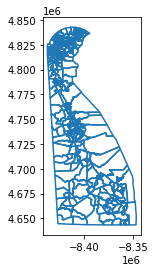

In [5]:
vest_shp.boundary.plot()

# Election Results

## Load 5 Files

The SOS directed us to this link for election results for the 2018 general: https://elections.delaware.gov/archive/elect16/elect16_general/html/index.shtml

We copy-pasted each election section to separate csv files and load them individually below. 

In [6]:
pre_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - pre_g16.csv')
pre_results = pre_results[(pre_results.Office == 'PRESIDENT') & (pre_results.District.str.contains('-'))]
pre_results.head()

,Office,District,Total,G16PREDCLI_mc,G16PREDCLI_abs,G16PREDCLI,G16PRERTRU_mc,G16PRERTRU_abs,G16PRERTRU,G16PREGSTE_mc,G16PREGSTE_abs,G16PREGSTE,G16PRELJOH_mc,G16PRELJOH_abs,G16PRELJOH
2,PRESIDENT,01-01,767,636,43,679,64,4,68,8,0,8,11,1,12
3,PRESIDENT,02-01,"1,246","1,125",52,"1,177",45,0,45,16,0,16,8,0,8
4,PRESIDENT,03-01,787,734,29,763,17,2,19,4,0,4,1,0,1
5,PRESIDENT,04-01,"1,081",978,33,"1,011",44,1,45,13,0,13,12,0,12
6,PRESIDENT,05-01,"1,219",938,49,987,163,6,169,25,1,26,36,1,37


In [7]:
hal_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - hal_g16.csv')
hal_results = hal_results[(hal_results.Office == 'REPRESENTATIVE IN CONGRESS') & (hal_results.District.str.contains('-'))]
hal_results.head()

,Office,District,Total,G16HALDROC_mc,G16HALDROC_abs,G16HALDROC,G16HALRREI_mc,G16HALRREI_abs,G16HALRREI,G16HALGPER_mc,G16HALGPER_abs,G16HALGPER,G16HALLGES_mc,G16HALLGES_abs,G16HALLGES
2,REPRESENTATIVE IN CONGRESS,01-01,748,619,43,662,60,4,64,12,1,13,8,1,9
3,REPRESENTATIVE IN CONGRESS,02-01,"1,170","1,059",50,"1,109",39,1,40,14,0,14,7,0,7
4,REPRESENTATIVE IN CONGRESS,03-01,751,693,26,719,16,3,19,8,0,8,5,0,5
5,REPRESENTATIVE IN CONGRESS,04-01,"1,005",921,31,952,34,2,36,11,0,11,6,0,6
6,REPRESENTATIVE IN CONGRESS,05-01,"1,155",885,46,931,171,6,177,34,2,36,10,1,11


In [8]:
gov_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - gov_g16.csv')
gov_results = gov_results[(gov_results.Office == 'GOVERNOR') & (gov_results.District.str.contains('-'))]
gov_results.head()

,Office,District,Total,G16GOVDCAR_mc,G16GOVDCAR_abs,G16GOVDCAR,G16GOVRBON_mc,G16GOVRBON_abs,G16GOVRBON,G16GOVGGRO_mc,G16GOVGGRO_abs,G16GOVGGRO,G16GOVLGOW_mc,G16GOVLGOW_abs,G16GOVLGOW
2,GOVERNOR,01-01,732,608,41,649,62,3,65,11,2,13,5,0,5
3,GOVERNOR,02-01,"1,138","1,011",49,"1,060",53,1,54,16,0,16,8,0,8
4,GOVERNOR,03-01,719,655,26,681,21,3,24,8,0,8,6,0,6
5,GOVERNOR,04-01,975,884,30,914,41,1,42,10,0,10,9,0,9
6,GOVERNOR,05-01,"1,137",888,42,930,164,7,171,24,2,26,8,2,10


In [9]:
ltg_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - ltg_g16.csv')
ltg_results = ltg_results[(ltg_results.Office == 'LIEUTENANT GOVERNOR') & (ltg_results.District.str.contains('-'))]
ltg_results.head()

,Office,District,Total,G16LTGDHAL_mc,G16LTGDHAL_abs,G16LTGDHAL,G16LTGRGUN_mc,G16LTGRGUN_abs,G16LTGRGUN
2,LIEUTENANT GOVERNOR,01-01,720,488,40,528,185,7,192
3,LIEUTENANT GOVERNOR,02-01,"1,101",884,46,930,169,2,171
4,LIEUTENANT GOVERNOR,03-01,728,564,24,588,136,4,140
5,LIEUTENANT GOVERNOR,04-01,962,816,28,844,116,2,118
6,LIEUTENANT GOVERNOR,05-01,"1,110",830,47,877,224,9,233


In [10]:
ins_results = pd.read_csv('./raw-from-source/SOS/DE Election Results - ins_g16.csv')
ins_results = ins_results[(ins_results.Office == 'INSURANCE COMMISSIONER') & (ins_results.District.str.contains('-'))]
ins_results.head()

,Office,District,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA
2,INSURANCE COMMISSIONER,01-01,717,593,43,636,80,1,81
3,INSURANCE COMMISSIONER,02-01,"1,105",997,50,"1,047",58,0,58
4,INSURANCE COMMISSIONER,03-01,726,666,25,691,31,4,35
5,INSURANCE COMMISSIONER,04-01,955,872,26,898,54,3,57
6,INSURANCE COMMISSIONER,05-01,"1,104",863,47,910,185,9,194


## Merge 5 Files

In [11]:
election_results = pre_results.merge(hal_results, how = 'outer', on = 'District').merge(gov_results, 
                                                  how = 'outer', on = 'District').merge(ltg_results, 
                                                  how = 'outer', on = 'District').merge(ins_results, 
                                                  how = 'outer', on = 'District')

In [12]:
cols = {x: 'float' for x in election_results.columns if 'G16' in x}
election_results = election_results.replace(',','', regex=True)
election_results = election_results.astype(cols)

# Validating Election Results

## Race Totals

In [13]:
vest_shp.columns

Index(['PRECINCT', 'G16PREDCLI', 'G16PRERTRU', 'G16PREGSTE', 'G16PRELJOH',
       'G16HALDROC', 'G16HALRREI', 'G16HALGPER', 'G16HALLGES', 'G16GOVDCAR',
       'G16GOVRBON', 'G16GOVGGRO', 'G16GOVLGOW', 'G16LTGDHAL', 'G16LTGRGUN',
       'G16INSDNAV', 'G16INSRCRA', 'geometry'],
      dtype='object')

In [14]:
data_columns = ['G16PREDCLI', 'G16PRERTRU', 'G16PREGSTE', 'G16PRELJOH',
       'G16HALDROC', 'G16HALRREI', 'G16HALGPER', 'G16HALLGES', 'G16GOVDCAR',
       'G16GOVRBON', 'G16GOVGGRO', 'G16GOVLGOW', 'G16LTGDHAL', 'G16LTGRGUN',
       'G16INSDNAV', 'G16INSRCRA']

print("Printing differences below")
for race in data_columns:
    if (sum(vest_shp[race])- election_results[race].sum() != 0):
        print(race+" has a difference of "+str(sum(vest_shp[race])-election_results[race].sum())+" votes")
        print("\tVEST: "+str(sum(vest_shp[race]))+" votes")
        print("\tSOURCES: "+str(election_results[race].sum())+" votes")
    else:
        print(race + " is equal", "\tVEST: " + str(sum(vest_shp[race])), "\tRDH: " + str(election_results[race].sum()))
print("")
print("All other races are equal")

Printing differences below
G16PREDCLI is equal 	VEST: 235603 	RDH: 235603.0
G16PRERTRU is equal 	VEST: 185127 	RDH: 185127.0
G16PREGSTE is equal 	VEST: 6103 	RDH: 6103.0
G16PRELJOH is equal 	VEST: 14757 	RDH: 14757.0
G16HALDROC is equal 	VEST: 233554 	RDH: 233554.0
G16HALRREI is equal 	VEST: 172301 	RDH: 172301.0
G16HALGPER is equal 	VEST: 8326 	RDH: 8326.0
G16HALLGES is equal 	VEST: 6436 	RDH: 6436.0
G16GOVDCAR is equal 	VEST: 248404 	RDH: 248404.0
G16GOVRBON is equal 	VEST: 166852 	RDH: 166852.0
G16GOVGGRO is equal 	VEST: 5951 	RDH: 5951.0
G16GOVLGOW is equal 	VEST: 4577 	RDH: 4577.0
G16LTGDHAL is equal 	VEST: 248141 	RDH: 248141.0
G16LTGRGUN is equal 	VEST: 169291 	RDH: 169291.0
G16INSDNAV is equal 	VEST: 246428 	RDH: 246428.0
G16INSRCRA is equal 	VEST: 169228 	RDH: 169228.0

All other races are equal


## County-by-County Totals

In [15]:
vest_shp.shape

(430, 18)

In [16]:
election_results.shape

(432, 59)

In [17]:
election_results.sort_values('District').head()

,Office_x,District,Total_x,G16PREDCLI_mc,G16PREDCLI_abs,G16PREDCLI,G16PRERTRU_mc,G16PRERTRU_abs,G16PRERTRU,G16PREGSTE_mc,...,G16LTGRGUN_abs,G16LTGRGUN,Office,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA
0,PRESIDENT,01-01,767,636.0,43.0,679.0,64.0,4.0,68.0,8.0,...,7.0,192.0,INSURANCE COMMISSIONER,717,593.0,43.0,636.0,80.0,1.0,81.0
14,PRESIDENT,01-02,1211,1131.0,41.0,1172.0,19.0,3.0,22.0,8.0,...,8.0,149.0,INSURANCE COMMISSIONER,1008,922.0,34.0,956.0,51.0,1.0,52.0
27,PRESIDENT,01-03,688,618.0,14.0,632.0,41.0,0.0,41.0,8.0,...,2.0,83.0,INSURANCE COMMISSIONER,592,524.0,13.0,537.0,55.0,0.0,55.0
37,PRESIDENT,01-04,1379,823.0,119.0,942.0,339.0,31.0,370.0,19.0,...,33.0,359.0,INSURANCE COMMISSIONER,1312,820.0,112.0,932.0,353.0,27.0,380.0
53,PRESIDENT,01-05,1408,996.0,57.0,1053.0,291.0,18.0,309.0,13.0,...,20.0,302.0,INSURANCE COMMISSIONER,1303,1028.0,51.0,1079.0,203.0,21.0,224.0


Note: New Castle is not fips code 001. The first two digits of `District` do not correspond to fips. 

In [19]:
vest_shp.sort_values('PRECINCT').head()

,PRECINCT,G16PREDCLI,G16PRERTRU,G16PREGSTE,G16PRELJOH,G16HALDROC,G16HALRREI,G16HALGPER,G16HALLGES,G16GOVDCAR,G16GOVRBON,G16GOVGGRO,G16GOVLGOW,G16LTGDHAL,G16LTGRGUN,G16INSDNAV,G16INSRCRA,geometry
5,01-01,681,68,8,12,663,64,13,9,649,65,13,5,528,192,636,81,"POLYGON ((-8407935.202 4831832.283, -8407957.0..."
6,01-02,1175,22,8,9,1008,17,18,11,995,21,10,5,870,149,956,52,"POLYGON ((-8410302.300 4827543.064, -8410298.6..."
7,01-03,633,41,9,6,547,28,12,16,539,36,19,8,482,83,537,55,"POLYGON ((-8411336.792 4828825.843, -8411346.1..."
8,01-04,944,370,19,48,926,380,15,17,1015,323,12,14,955,359,932,380,"POLYGON ((-8413287.555 4832059.508, -8413275.1..."
9,01-05,1055,309,14,32,1032,233,25,9,1037,243,20,9,994,302,1079,224,"POLYGON ((-8420436.604 4810966.168, -8420438.1..."


We will only validate the statewide totals and not continue to validate the county totals at this time, because the SOS file and the VEST file do not break out election results by county. There are only 3 counties in Delaware. 

## Precinct-by-Precinct Votes

### Join VEST and RDH

In [20]:
merge_df = vest_shp.merge(election_results, left_on = 'PRECINCT', right_on = 'District', how = 'outer', indicator = True)

In [21]:
merge_df.groupby('_merge').count()

,PRECINCT,G16PREDCLI_x,G16PRERTRU_x,G16PREGSTE_x,G16PRELJOH_x,G16HALDROC_x,G16HALRREI_x,G16HALGPER_x,G16HALLGES_x,G16GOVDCAR_x,...,G16LTGRGUN_abs,G16LTGRGUN_y,Office,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV_y,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA_y
_merge,,,,,,,,,,,,,,,,,,,,,
left_only,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
right_only,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
both,429,429,429,429,429,429,429,429,429,429,...,429,429,429,429,429,429,429,429,429,429


In [22]:
merge_df[merge_df['_merge'] != 'both']

,PRECINCT,G16PREDCLI_x,G16PRERTRU_x,G16PREGSTE_x,G16PRELJOH_x,G16HALDROC_x,G16HALRREI_x,G16HALGPER_x,G16HALLGES_x,G16GOVDCAR_x,...,G16LTGRGUN_y,Office,Total,G16INSDNAV_mc,G16INSDNAV_abs,G16INSDNAV_y,G16INSRCRA_mc,G16INSRCRA_abs,G16INSRCRA_y,_merge
429,13-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only
432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,right_only


### Validate

In [23]:
def validater_row (df, column_List):
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for j in range(0,len(df.index)):
        same = True
        for i in column_List:
            left_Data = i + "_x"
            right_Data = i + "_y"
            diff = abs(df.iloc[j][left_Data]-df.iloc[j][right_Data])
            if(diff >0):
                if(diff>0):
                    print(i, "{:.>72}".format(df.iloc[j]["PRECINCT"]), "(V)","{:.>5}".format(int(df.iloc[j][left_Data]))," (S){:.>5}".format(int(df.iloc[j][right_Data])),"(D):{:>5}".format(int(df.iloc[j][right_Data])-int(df.iloc[j][left_Data])))           
                #print(df.iloc[j]['countypct'])
                
                diff_values.append(abs(diff))
                same = False
                if(np.isnan(diff)):
                    print("NaN value at diff is: ", df.iloc[j]["PRECINCT"])
                    print(df.iloc[j][left_Data])
                    print(df.iloc[j][right_Data])
                if (diff>max_diff):
                    max_diff = diff
                    #print("New max diff is: ", str(max_diff))
                    #print(df.iloc[j]['cty_pct'])
        if(same != True):
            different_rows +=1
            diff_list.append(df.iloc[j]["PRECINCT"])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    diff_list.sort()
    print(diff_list)
    
validater_row(merge_df[merge_df['_merge'] == 'both'],data_columns)


G16PREDCLI ...................................................................01-21 (V) ..334  (S)..333 (D):   -1
G16HALDROC ...................................................................01-21 (V) ..325  (S)..324 (D):   -1
G16PREDCLI ...................................................................01-22 (V) ..654  (S)..653 (D):   -1
G16PRERTRU ...................................................................01-22 (V) ..577  (S)..576 (D):   -1
G16HALDROC ...................................................................01-22 (V) ..619  (S)..618 (D):   -1
G16HALRREI ...................................................................01-22 (V) ..596  (S)..595 (D):   -1
G16PREDCLI ...................................................................01-24 (V) ..726  (S)..724 (D):   -2
G16HALDROC ...................................................................01-24 (V) ..718  (S)..716 (D):   -2
G16HALGPER ...................................................................01-24 (V) 

With respect to election results, VEST says: 
>Precincts 17-02, 16-31, and 16-41 are the reporting units for UOCAVA votes from New Castle, Kent, and Sussex Counties, respectively. These were distributed by candidate to precincts based on their share of the precinct-level reported vote.



It's unclear why VEST is off by a maximum of 3 votes in 328 precincts, as they do not say that they distributed votes in counties, except for New Castle, Kent, and Sussex, based on their documentation. 